# Basic Test

In [1]:

from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

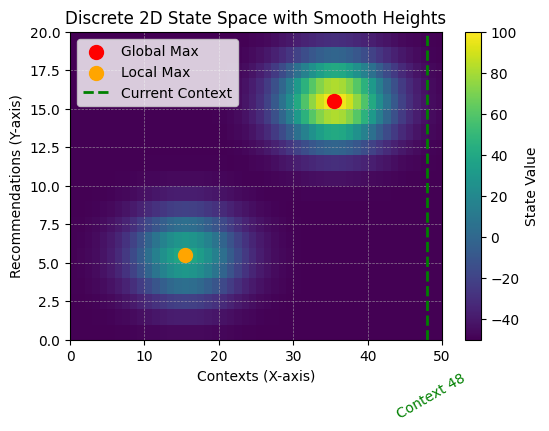

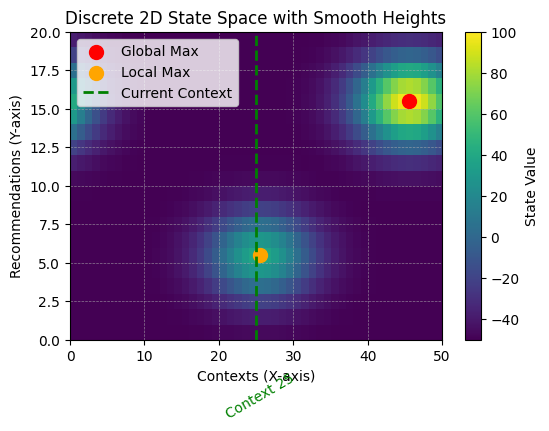

[48, np.int64(1), np.int64(6), np.int64(7), np.int64(5), np.int64(10), np.int64(11), np.int64(16), np.int64(21), np.int64(26), np.int64(25)]


In [2]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

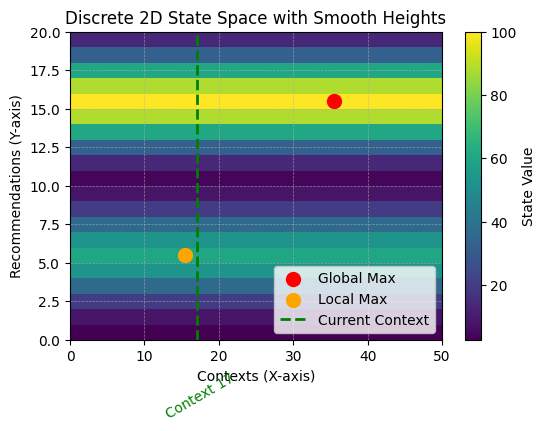

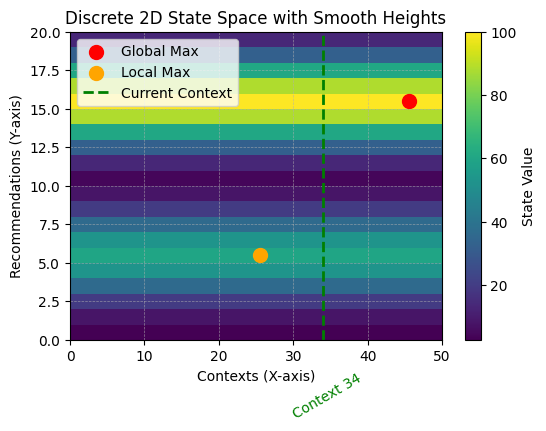

[17, np.int64(19), np.int64(16), np.int64(19), np.int64(24), np.int64(28), np.int64(24), np.int64(28), np.int64(24), np.int64(29), np.int64(34)]


In [3]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

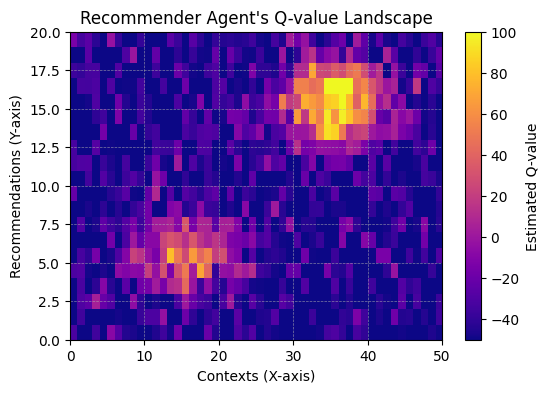

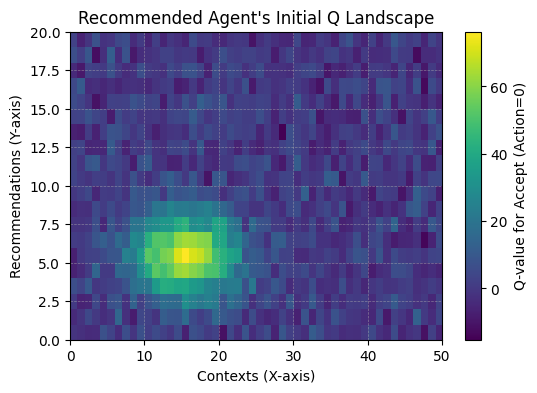

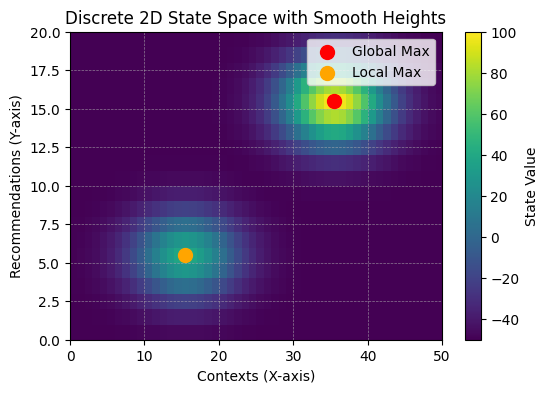

Running Simulation: 100%|██████████| 1000000/1000000 [01:49<00:00, 9139.14it/s]


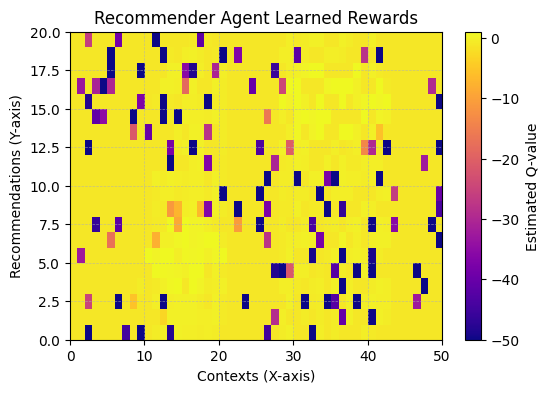

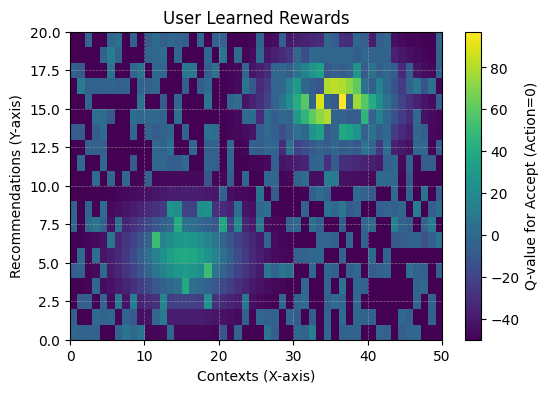

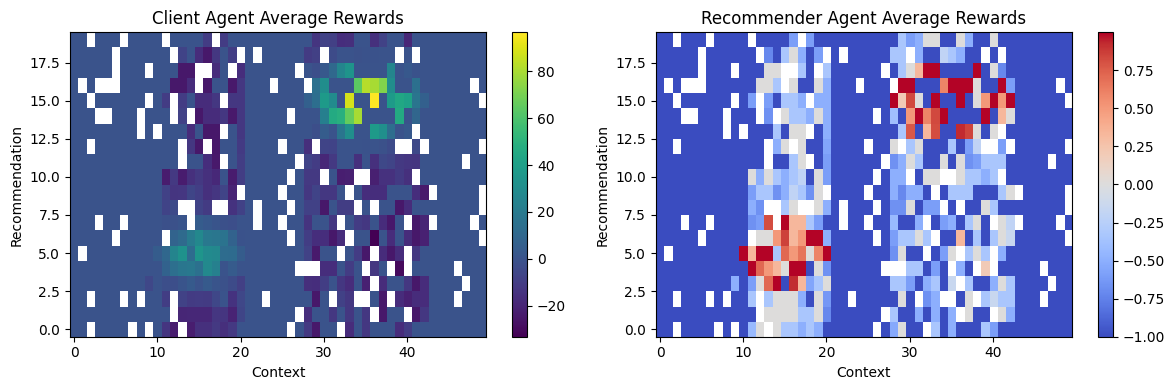

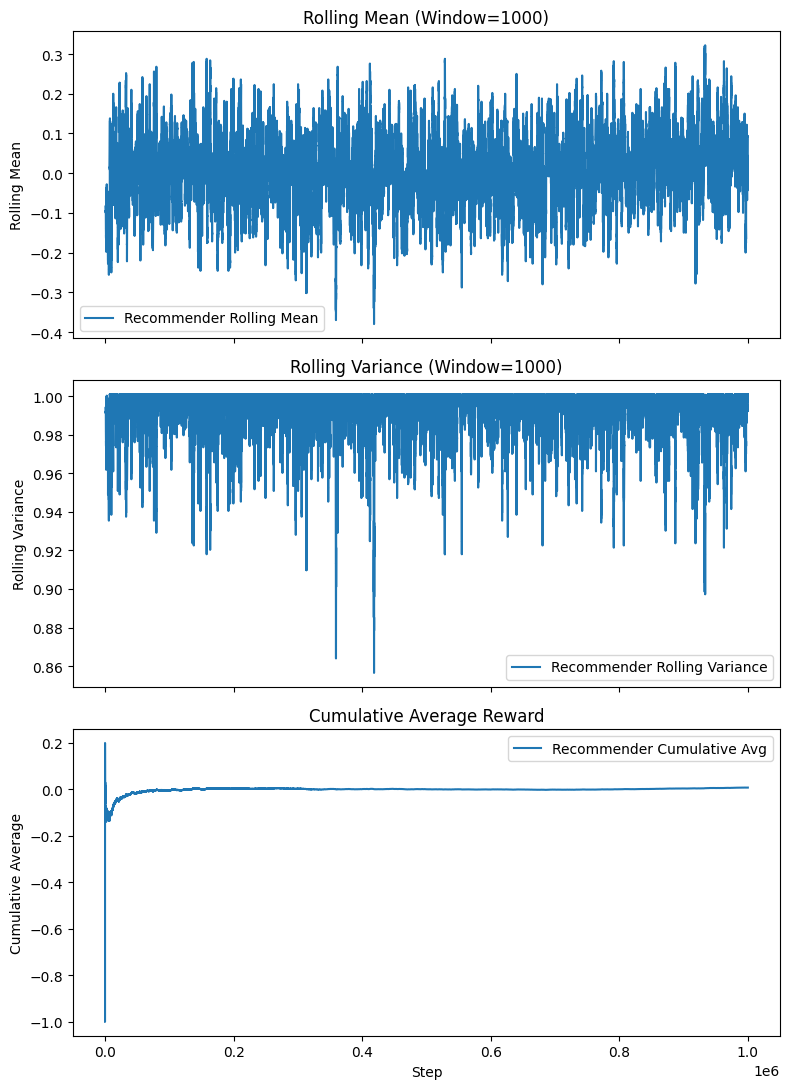

In [4]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
# stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# # Plot the p-values
# plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

# stationarity_df = test_stationarity_by_context(
#     contexts=results["context_history"],
#     rewards=results["recommender_rewards"])
# print(stationarity_df)

## Non-Stationary, Initiation, No Modulation



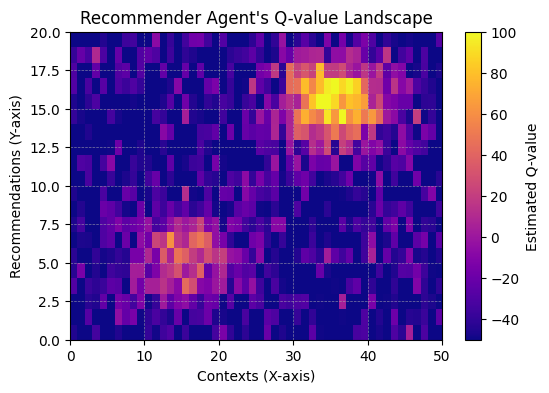

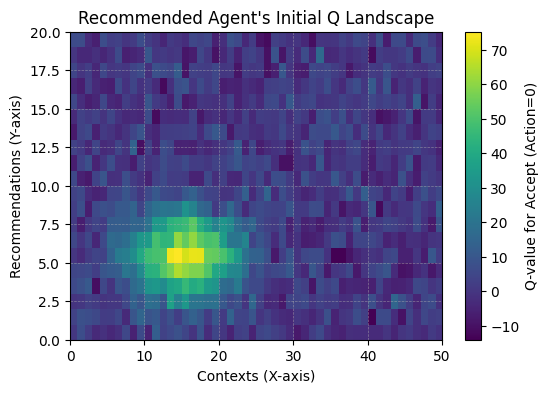

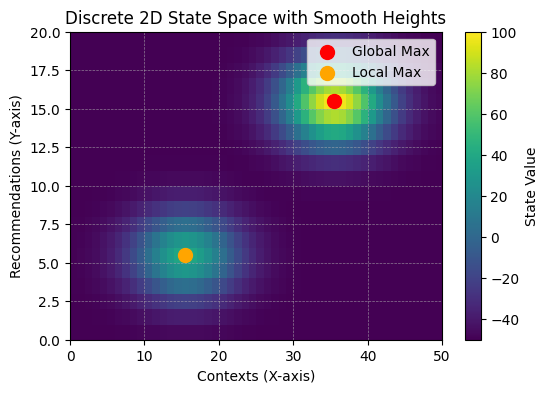

Running Simulation:  31%|███       | 310007/1000000 [01:00<02:46, 4155.23it/s]

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended= True,
                                    landscape_type='default',
                                    stationarity=False, type='ucb', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
# stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# # Plot the p-values
# plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

# stationarity_df = test_stationarity_by_context(
#     contexts=results["context_history"],
#     rewards=results["recommender_rewards"])
# print(stationarity_df)

## Stationary, Initiation, Moody Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# # Run sliding window tests
# stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# # Plot the p-values
# plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

# stationarity_df = test_stationarity_by_context(
#     contexts=results["context_history"],
#     rewards=results["recommender_rewards"])
# print(stationarity_df)

## Stationary, Initiation, Homeostatic Modulation

In [ ]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# # adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# # kpss_test(reward_series, name="Recommender Reward Signal")
# # Run sliding window tests
# stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# # Plot the p-values
# plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

# stationarity_df = test_stationarity_by_context(
#     contexts=results["context_history"],
#     rewards=results["recommender_rewards"])
# print(stationarity_df)